## Question 1

In [162]:
# Import the required libraries: 
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
# Reed the three excel sheets: 
measurement = pd.read_excel('question_1_2.xlsx', sheet_name='Measurements')
product_sec = pd.read_excel('question_1_2.xlsx', sheet_name='Production_Sequence')
specification = pd.read_excel('question_1_2.xlsx', sheet_name='Specifications')

### Question 1.1.

In [164]:
# Merge the Measurements and Specifications sheets according to Product_Code:
merged = pd.merge(measurement, specification, on='Product_Code')

# Calculate mean and standard deviation for each Product_Code:
result = merged.groupby('Product_Code').agg({'T_Height': ['mean', 'std'], 'T_Weight': ['mean', 'std']})

print(result)

              T_Height            T_Weight           
                  mean       std      mean        std
Product_Code                                         
LIF001_B       8.94075  0.243075  384.9100   0.299333
LIF001_Y      10.26850  0.789054  382.8250   6.747099
LIF002_R       9.30775  0.827245  314.7225  15.902541
LIF002_Y       8.18975  0.419309  523.7950   5.979415


### Question 1.2.

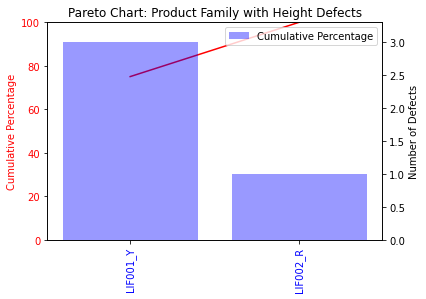

LIF001_Y    3
LIF002_R    1
Name: Product_Code, dtype: int64


In [165]:
# Filter the defective parts based on height > USL:
height_defect = merged[merged['T_Height'] > merged['USL']]

# Calculate the numver of defective parts based on product family:
count_defect = height_defect['Product_Code'].value_counts() 

# Sort the defective count in a descending order:
count_defect = count_defect.sort_values(ascending=False)

# Calculate the cumulative percentage to draw on the Pareto Chart:
cumulative_percentage = count_defect.cumsum() / count_defect.sum() * 100

# Draw the Pareto chart: 
figure, axis1 = plt.subplots()

# Add the cumulative percentage:
axis1.plot(range(1, len(count_defect) + 1), cumulative_percentage, color='red')
axis1.set_ylabel('Cumulative Percentage', color='red')
axis1.tick_params(axis='y', labelcolor='red')
axis1.set_ylim([0, 100])

# Plot the number of defects as bars:
axis2 = axis1.twinx()
axis2.bar(range(1, len(count_defect) + 1), count_defect, color='blue', alpha=0.4)
axis2.set_ylabel('Number of Defects')
axis2.set_ylim([0, count_defect.max() * 1.1])

# Add x-axis labels:
axis1.set_xticks(range(1, len(count_defect) + 1))
axis1.set_xticklabels(count_defect.index, color='blue', rotation=90)

# Add the titles:
plt.title('Pareto Chart: Product Family with Height Defects')
plt.legend(['Cumulative Percentage', 'Number of Defects'])

# Plot:
plt.show()
print(count_defect)

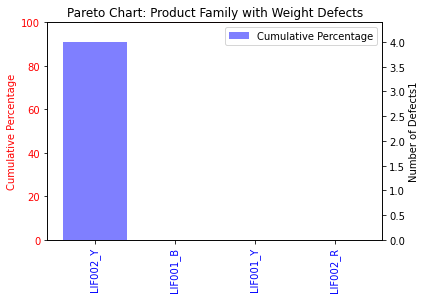

LIF002_Y    4
LIF001_B    0
LIF001_Y    0
LIF002_R    0
Name: Product_Code, dtype: int64


In [166]:
# Filter the defective parts based on weight > USL
weight_defect = merged[merged['T_Weight'] > merged['USL']]

# Calculate the numver of defective parts based on product family:
count1_defect = weight_defect['Product_Code'].value_counts()-4 

# Sort the defective count in a descending order:
count1_defect = count1_defect.sort_values(ascending=False)

# Calculate the cumulative percentage to draw on the Pareto Chart:
cumulative_percentage1 = count1_defect.cumsum() / count1_defect.sum() * 100

# Draw the Pareto chart: 
figure1, axis3 = plt.subplots()

# Add the cumulative percentage:
axis3.plot(range(1, len(count1_defect) + 1), cumulative_percentage1, color='red')
axis3.set_ylabel('Cumulative Percentage', color='red')
axis3.tick_params(axis='y', labelcolor='red')
axis3.set_ylim([0, 100])

# Plot the number of defects as bars:
axis4 = axis3.twinx()
axis4.bar(range(1, len(count1_defect) + 1), count1_defect, color='blue', alpha=0.5)
axis4.set_ylabel('Number of Defects1')
axis4.set_ylim([0, count1_defect.max() * 1.1])

# Add x-axis labels:
axis3.set_xticks(range(1, len(count1_defect) + 1))
axis3.set_xticklabels(count1_defect.index, color='blue', rotation=90)

# Add the titles:
plt.title('Pareto Chart: Product Family with Weight Defects')
plt.legend(['Cumulative Percentage', 'Number of Defects1'])

# Plot:
plt.show()
print(count1_defect)

### LIF002_Y product family has the highest number of defects (4), then LIF001_Y family with (3) defects, and finally the LIF002_R with 1 defect.

### Question 1.3.

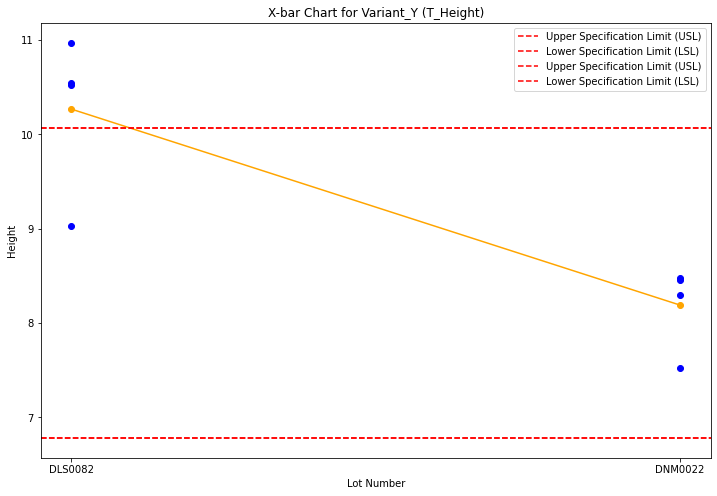

In [167]:
# Filter variant_Y data in the Measurements sheet:
variant_y = measurement[measurement['Product_Code'].isin(['LIF001_Y', 'LIF002_Y'])]

# Group by Lot_No, add individual height values and determine the mean for each lot:
mean_height_y = variant_y.groupby('Lot_No')['T_Height'].mean()
values_height_y = variant_y.groupby('Lot_No')['T_Height'].apply(list)

# Add the control limits for T_Height in variant Y from the Specifications sheet:
control_limits = specification.loc[(specification['Product_Code'].isin(['LIF001_Y', 'LIF002_Y'])) & (specification['T_Name'] == 'T_height'), ['LSL', 'USL']]

# Add the figure:
plt.figure(figsize=(12, 8))

# Plot the height data:
for lot, heights in values_height_y.items():
    plt.scatter([lot] * len(heights), heights, color='b')

# Plot mean:
plt.plot(mean_height_y.index, mean_height_y, 'o-', color='orange')

# Add the control limits to the plot:
for _, limit in control_limits.iterrows():
    plt.axhline(limit['USL'], color='r', linestyle='--', label='Upper Specification Limit (USL)')
    plt.axhline(limit['LSL'], color='r', linestyle='--', label='Lower Specification Limit (LSL)')

plt.xlabel('Lot Number')
plt.ylabel('Height')
plt.title('X-bar Chart for Variant_Y (T_Height)')
plt.legend()
plt.show()

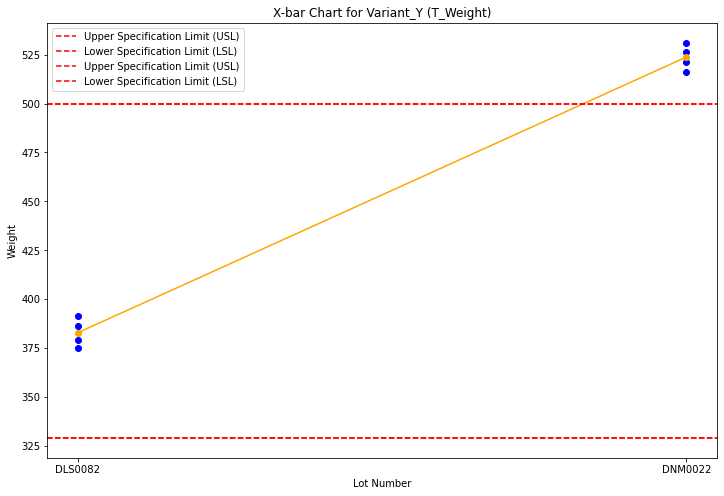

In [168]:
# Group by Lot_No, add individual height values and determine the mean for each lot:
mean_weight_y = variant_y.groupby('Lot_No')['T_Weight'].mean()
values_weight_y = variant_y.groupby('Lot_No')['T_Weight'].apply(list)

# Add the control limits for T_Height in variant Y from the Specifications sheet:
control_limits = specification.loc[(specification['Product_Code'].isin(['LIF001_Y', 'LIF002_Y'])) & (specification['T_Name'] == 'T_weight'), ['LSL', 'USL']]

# Add the figure:
plt.figure(figsize=(12, 8))

# Plot the height data:
for lot, weights in values_weight_y.items():
    plt.scatter([lot] * len(weights), weights, color='b')

# Plot mean:
plt.plot(values_weight_y.index, mean_weight_y, 'o-', color='orange')

# Add the control limits to the plot:
for _, limit in control_limits.iterrows():
    plt.axhline(limit['USL'], color='r', linestyle='--', label='Upper Specification Limit (USL)')
    plt.axhline(limit['LSL'], color='r', linestyle='--', label='Lower Specification Limit (LSL)')

plt.xlabel('Lot Number')
plt.ylabel('Weight')
plt.title('X-bar Chart for Variant_Y (T_Weight)')
plt.legend()
plt.show()

### Accoridng to the weight DLS0082 is better, but it's not the better for height.  In total DLS0082 has 3 defects while DNM0022 has 4, so DLS0082 is better. These results validates the results in part 1.2.

### Question 1.4.

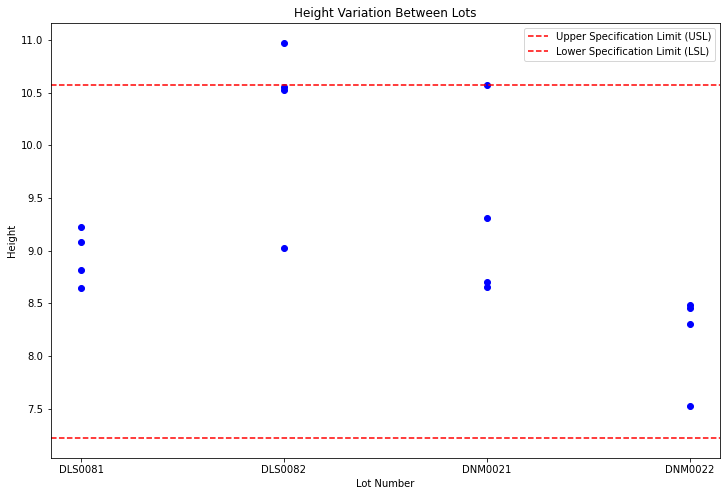

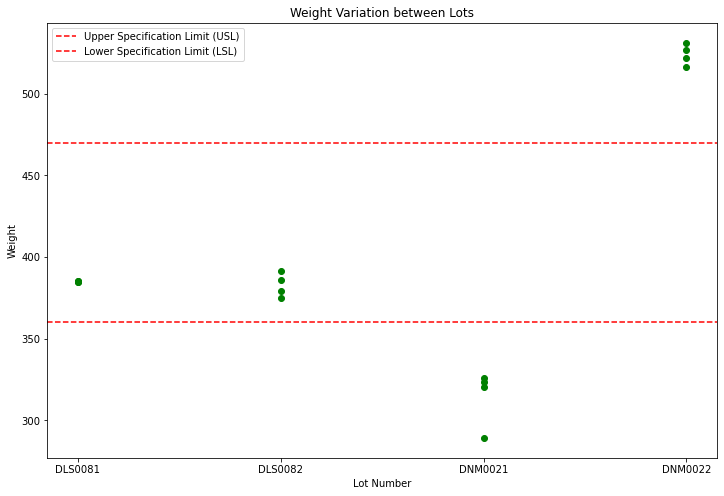

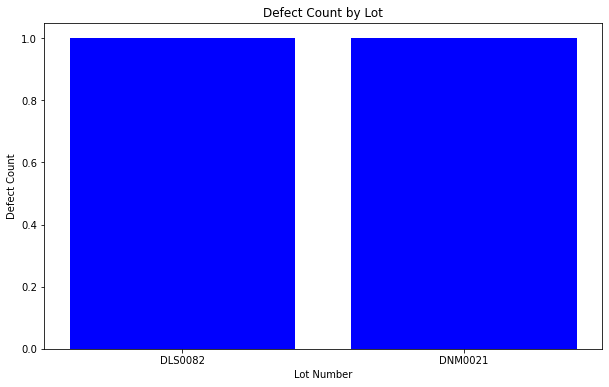

In [169]:
# Add a plot showing the height variation between lots:
plt.figure(figsize=(12, 8))
plt.scatter(measurement['Lot_No'], measurement['T_Height'], color='b')
plt.xlabel('Lot Number')
plt.ylabel('Height')
plt.title('Height Variation Between Lots')

# Add USL and LSL (control limits):
usl_height = specification.loc[specification['T_Name'] == 'T_height', 'USL'].values[0]
lsl_height = specification.loc[specification['T_Name'] == 'T_height', 'LSL'].values[0]
plt.axhline(usl_height, color='r', linestyle='--', label='Upper Specification Limit (USL)')
plt.axhline(lsl_height, color='r', linestyle='--', label='Lower Specification Limit (LSL)')

plt.legend()
plt.show()

# Plot the weight variation between lots:
plt.figure(figsize=(12, 8))
plt.scatter(measurement['Lot_No'], measurement['T_Weight'], color='g')
plt.xlabel('Lot Number')
plt.ylabel('Weight')
plt.title('Weight Variation between Lots')

# Add USL and LSL
usl_weight = specification.loc[specification['T_Name'] == 'T_weight', 'USL'].values[0]
lsl_weight = specification.loc[specification['T_Name'] == 'T_weight', 'LSL'].values[0]
plt.axhline(usl_weight, color='r', linestyle='--', label='Upper Specification Limit (USL)')
plt.axhline(lsl_weight, color='r', linestyle='--', label='Lower Specification Limit (LSL)')

plt.legend()
plt.show()

# Defect count by lot and product family
defect_count = measurement[measurement['T_Height'] > usl_height].groupby(['Lot_No', 'Product_Code']).size().reset_index(name='Defect_Count')

plt.figure(figsize=(10, 6))
plt.bar(defect_count['Lot_No'], defect_count['Defect_Count'], color='b')
plt.xlabel('Lot Number')
plt.ylabel('Defect Count')
plt.title('Defect Count by Lot')
plt.show()


### Question 1.5.

The provided data is not sufficient to project the test variation for future, first the given data is not sufficient and do not provide any information about the trends. 
We will need historical data, test variation, process improvements or changes, and any external factors to analyze the process behavour and estimate its capability. 